In [1]:
#Importing the libraries that I'm going to use across the project
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from sklearn import tree

In [2]:
#Importing the dataset and converting it into a dataframe
data = pd.read_csv("C:\\Users\\sghoz\\OneDrive\\Desktop\\Datasets\\Iris (1).csv")
df = pd.DataFrame(data)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#To get the number of rows and columns of the dataframe
df.shape

(150, 6)

In [4]:
#Getting info about our df such as the nunber of rows/columns , memory usage, data type of each column, number of non-null values for each column / feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# We recognize that the data type of each column is assigned correctly , also we can recognize that there isn;t any null values in all of the columns

In [5]:
#Getting more info about the numerical columns as min , max , quartiles, etc..
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# A kind of validating the values in each column, we can look for the max and min values. since these numerical columns represent length and width , so their values should be positive and this can be shown through the min values as they don't subceed 0 

In [6]:
#Another way to check for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#Checking for any duplicates
df.duplicated().any()

False

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#We won't include the Id column as it's just incremental values for identifying the rows
numerical_cols = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

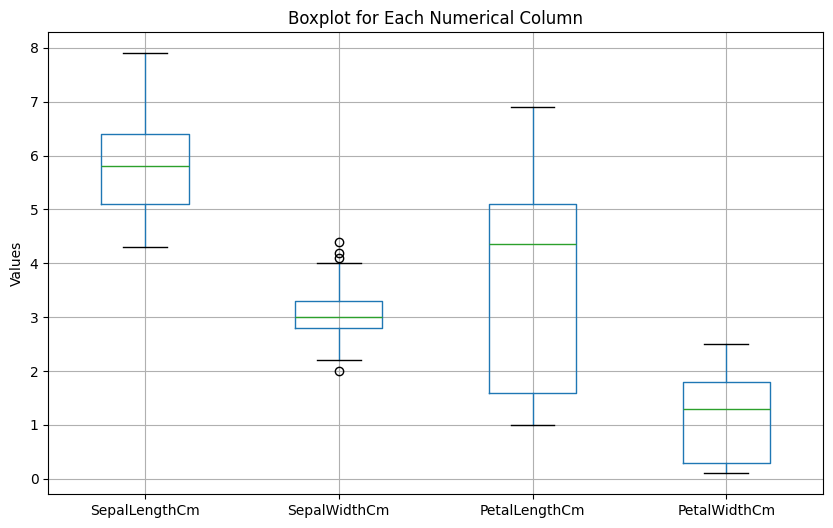

In [10]:
plt.figure(figsize=(10, 6))
numerical_cols.boxplot()
plt.title('Boxplot for Each Numerical Column')
plt.ylabel('Values')
plt.show()

# We can see that the SepalWidthCm feature has 4 points considered as outliers (as they lie below / above  the 1st and 3rd quartiles respectively), so it would be better to drop the rows containing these 4 points , so that they don't affect our analysis 

In [11]:
df = df[(df['SepalWidthCm'] >= 2.1) & (df['SepalWidthCm'] <= 4)]

# This is the boxplot after dropping the outliers

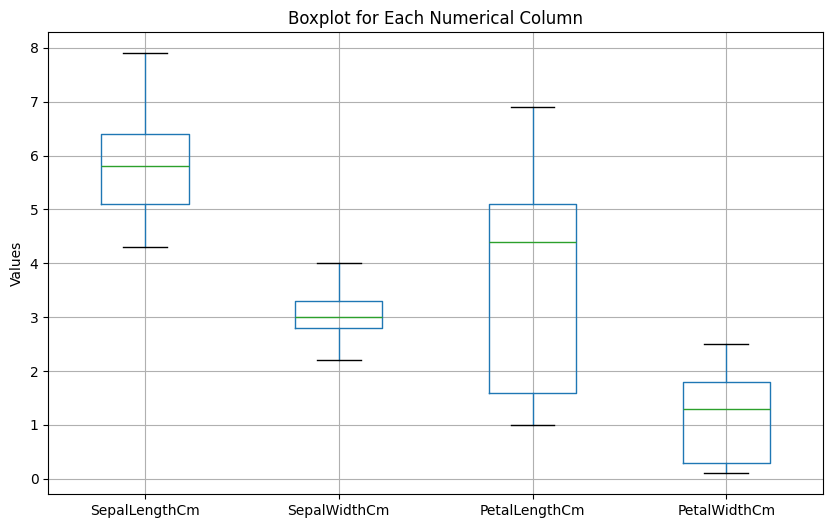

In [12]:
plt.figure(figsize=(10, 6))
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].boxplot()
plt.title('Boxplot for Each Numerical Column')
plt.ylabel('Values')
plt.show()

In [13]:
df.shape

(146, 6)

# We can see that the number of rows is decreased by 4 rows which are the rows containing the outliers

In [14]:
mean_dict = {}
for col in numerical_cols:
    mean_dict[col] = (numerical_cols[col].mean()).round(2)

mean_dict

{'SepalLengthCm': 5.84,
 'SepalWidthCm': 3.05,
 'PetalLengthCm': 3.76,
 'PetalWidthCm': 1.2}

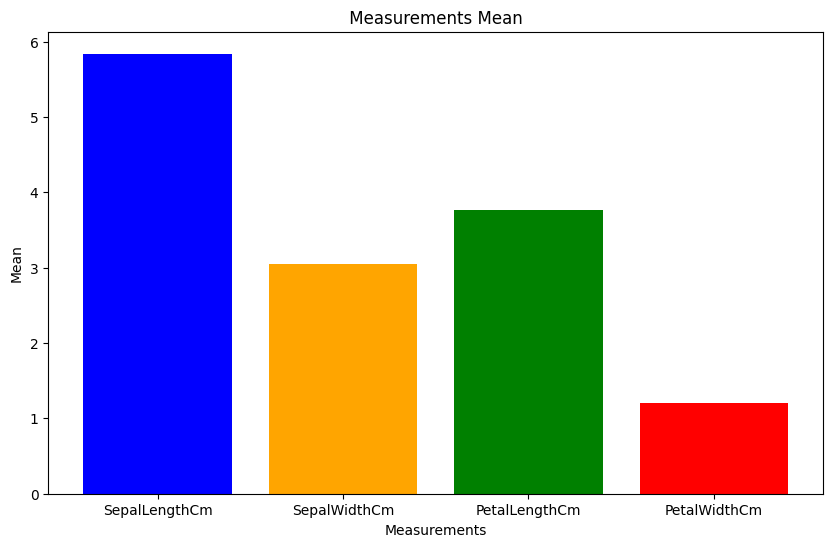

In [15]:
# Create a bar plot for the mean of each of the 4 numerical columns
plt.figure(figsize=(10, 6))
plt.bar(mean_dict.keys(), mean_dict.values(), color=['blue', 'orange', 'green', 'red'])
plt.title(' Measurements Mean ')
plt.xlabel('Measurements')
plt.ylabel('Mean')
plt.show()

In [16]:
#To know whether these columns are correlated with each other or not
corrs = numerical_cols.corr(method="pearson")
corrs

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


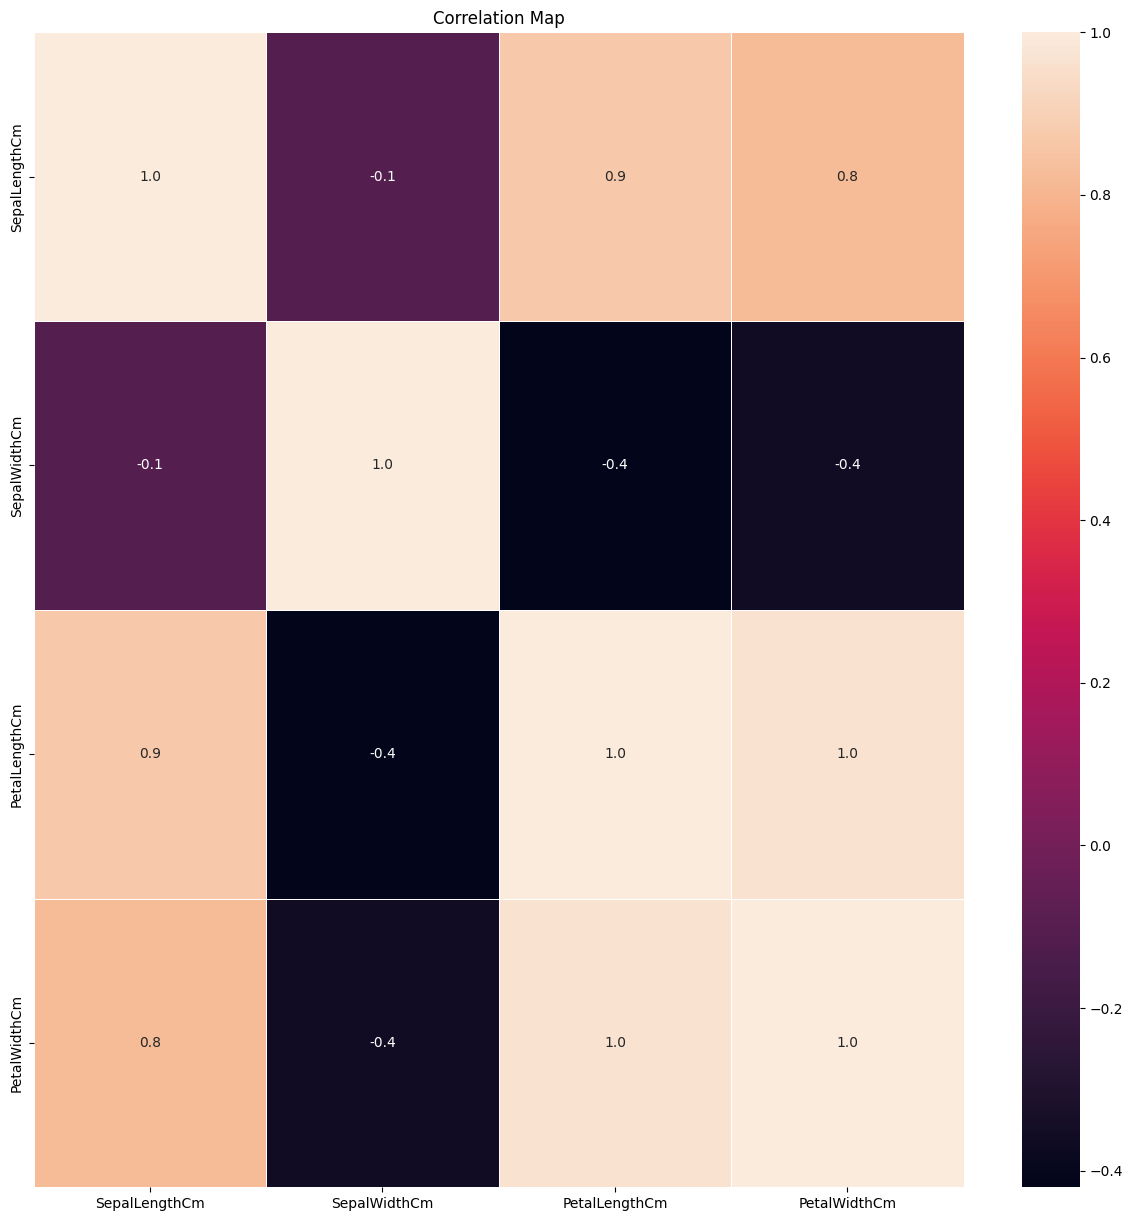

In [17]:
# Creating a correlation map to show the values of the correlated and uncorrelated columns
f,ax = plt.subplots(figsize=(15, 15)) # Controls the figure size
sns.heatmap(corrs, annot=True, linewidths=.5, fmt= '.1f',ax=ax) # Annot shows the value of the correlated index
plt.title("Correlation Map")
plt.show()

# We get that the Sepal length is strongly positive correlated with the petal length and petal widthso whenever one of them increases / decreases the same thing happens to the other columns too.

   # And that the Petal length and the Petal width are strongly positive correlated with each other with value = 1.0 which is the highest value that could be reached

# Decision Tree

In [18]:
#Splitting the features into X and Y (label) values
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = df.Species

In [19]:
# Split dataset into training set and test set

#70% of the data will be used for training the model and 30% for testing and evaluating it 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 

In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [21]:
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [22]:
#Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9318181818181818


In [37]:
#The confusion matrix of the result of the model (how many times the model was able to predict the class correclty and incorrectly)
cm = multilabel_confusion_matrix(y_test,y_pred)

In [42]:
# True Positive (TP): Instances that are correctly predicted as belonging to the positive class by the classifier.
# True Negative (TN): Instances that are correctly predicted as not belonging to the positive class by the classifier.
# False Positive (FP): Instances that are incorrectly predicted as belonging to the positive class by the classifier (also known as Type I error).
# False Negative (FN): Instances that are incorrectly predicted as not belonging to the positive class by the classifier (also known as Type II error).

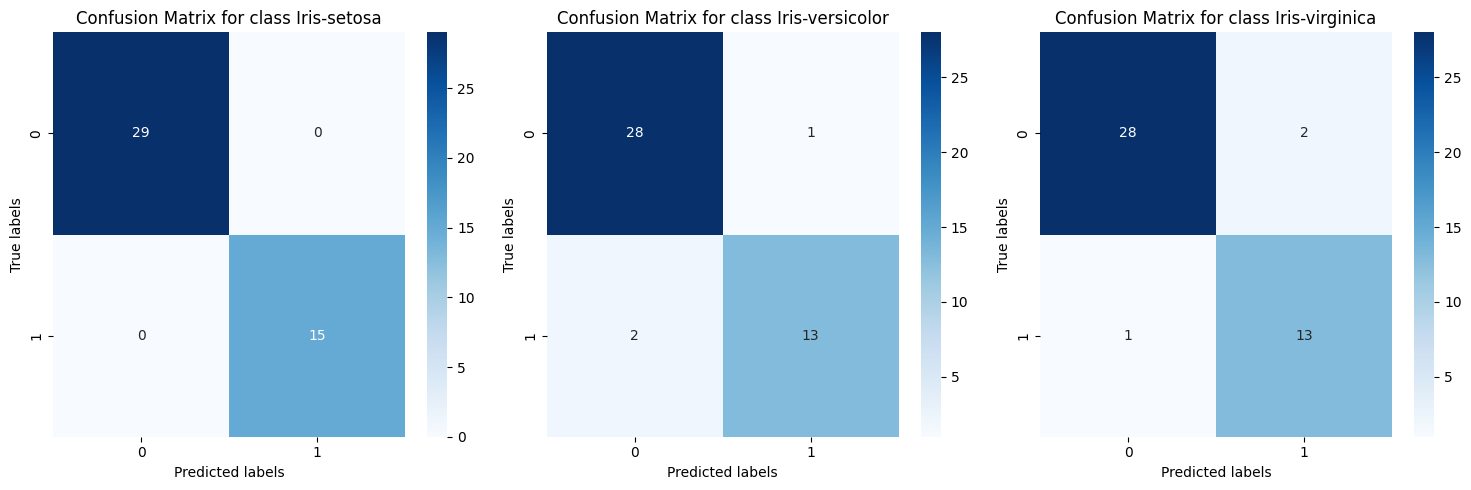

In [41]:
# Plot confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
class_names = Y.unique()

for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm[i], annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix for class {class_names[i]}')

plt.tight_layout()
plt.show()

# From the previous plot, if we looked at that of the versicolor class we'll find that the model was able to predict the label correctly for 41 times (in both cases when the class wasn't setosa and when it was versicolor) , and the model wasn't able to predict the class correctly for 3 times. 

In [24]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.75
|   |--- class: Iris-setosa
|--- feature_3 >  0.75
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_0 <= 6.15
|   |   |   |   |--- feature_2 <= 5.05
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_2 >  5.05
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.15
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- class: Iris-virginica



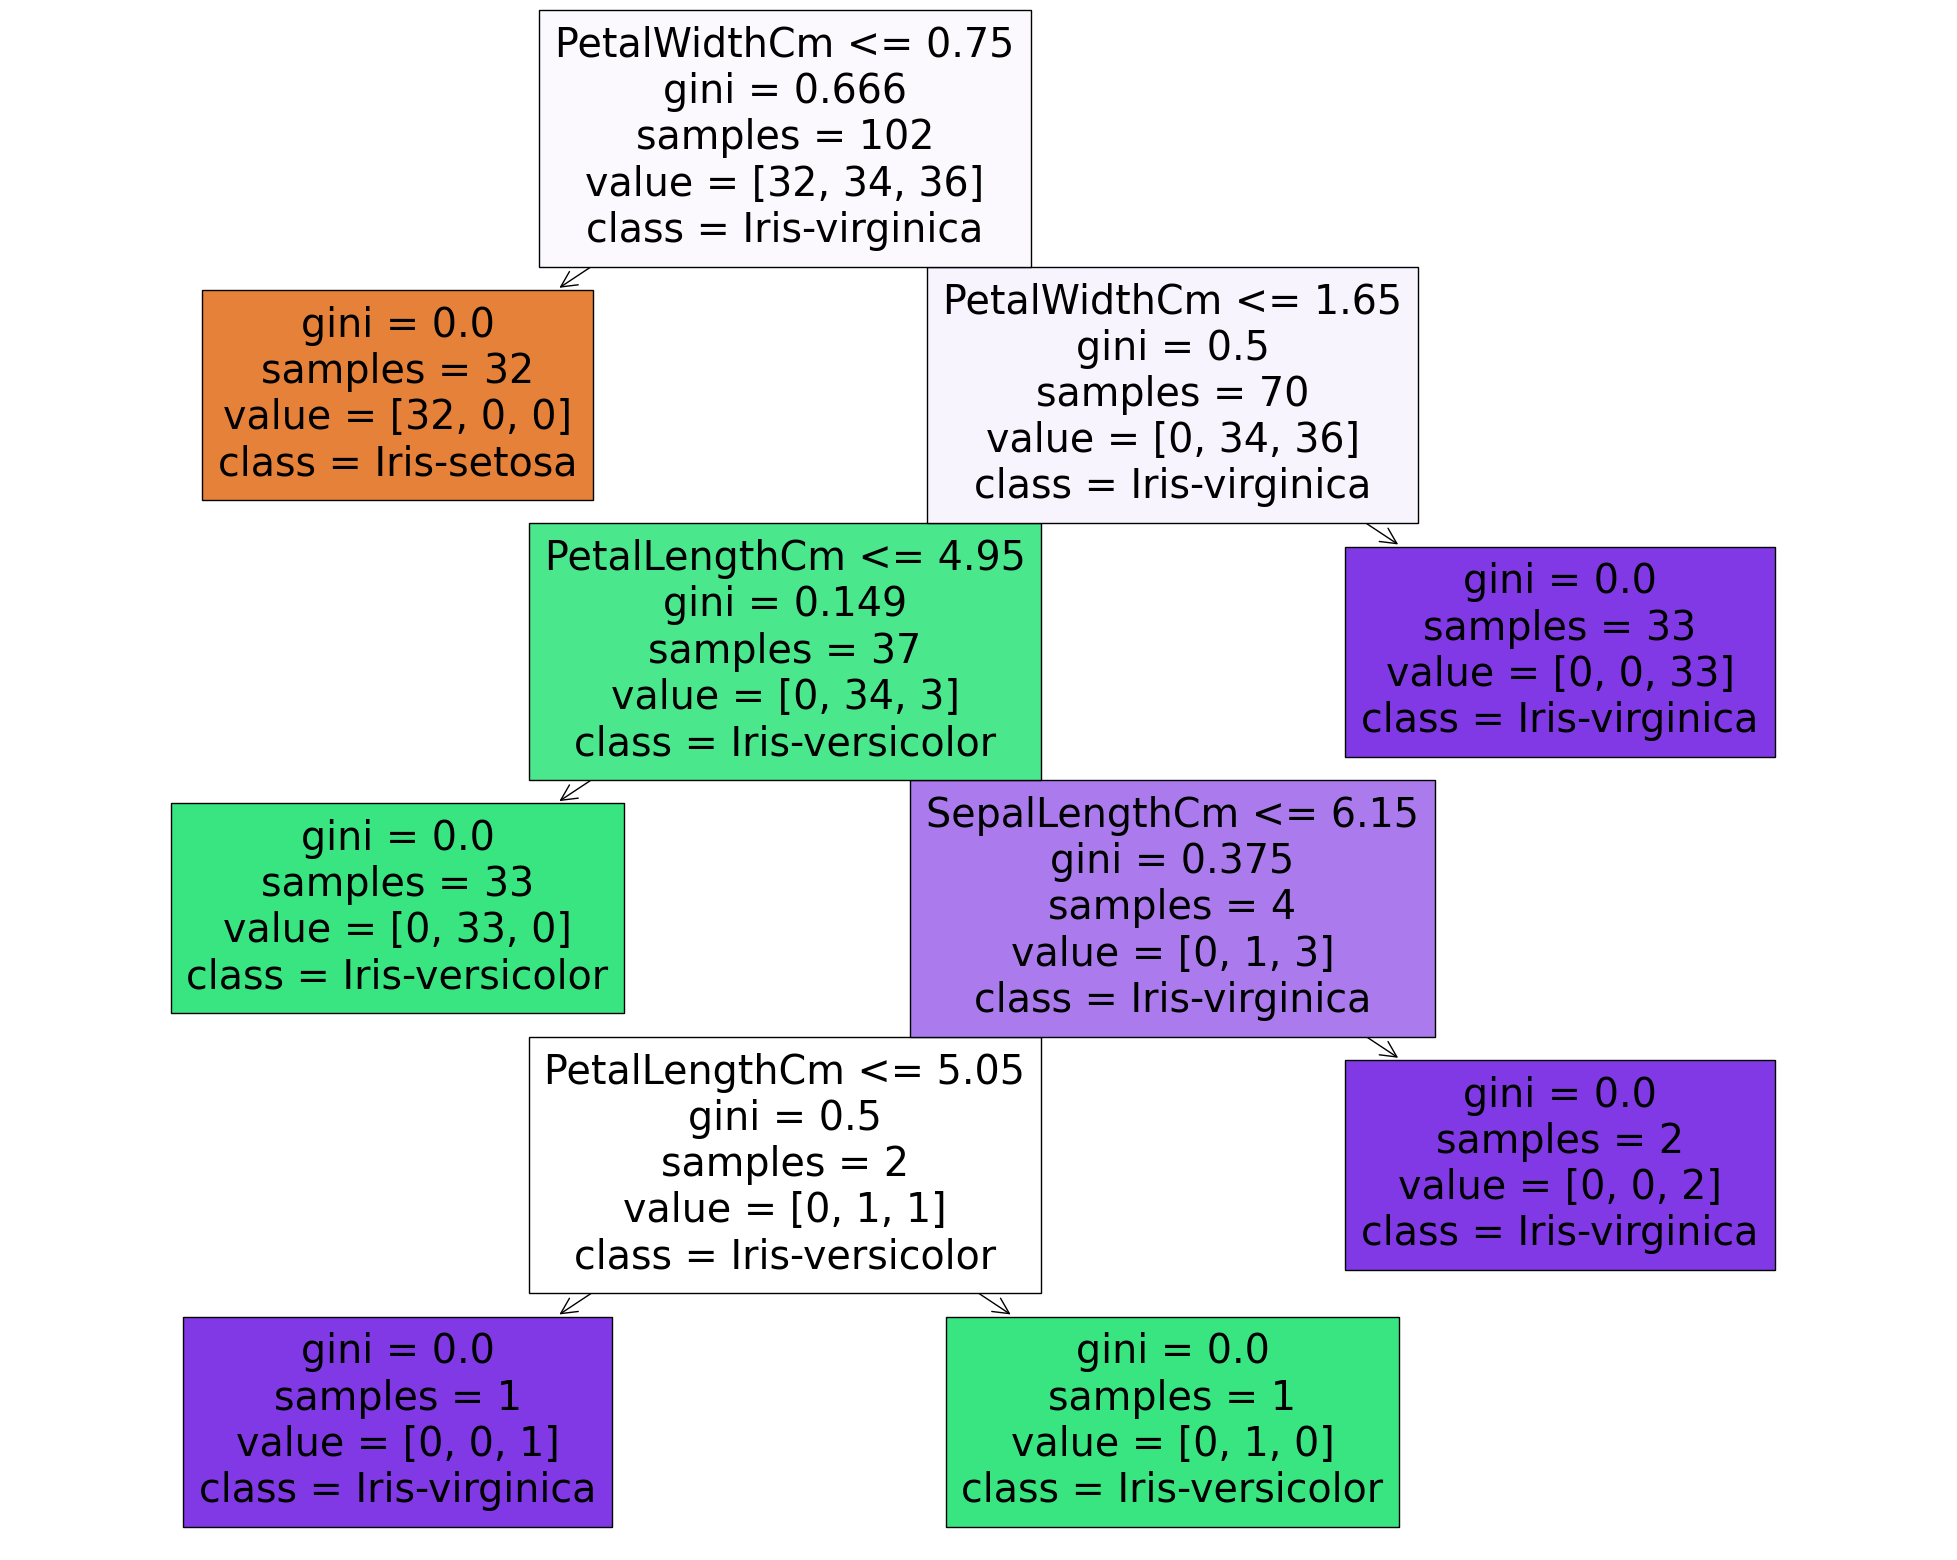

In [43]:
#Plotting the decision tree of the iris dataset
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=df.Species.unique(),
                   filled=True)